PROJECT NAME - UBER RIDE ANALYSIS

SUMMARY- 
In today’s highly dynamic urban transport systems, ride-hailing services like Uber play a critical role in providing flexible and efficient mobility solutions. However, even popular services face operational challenges, especially during high-demand hours. This project focuses on exploring and analyzing Uber ride request data to identify underlying issues such as trip cancellations, driver unavailability, and peak-time inefficiencies.

The main objective of this project is to understand the patterns in ride requests and trip statuses using a combination of Exploratory Data Analysis (EDA) in Python and insight extraction using SQL queries. By cleaning and processing real-world Uber request data, we aim to highlight the root causes of customer dissatisfaction and operational bottlenecks, and recommend improvements based on data-driven evidence.
    
Tools Used:
    Python (pandas, seaborn, matplotlib)
    Jupyter Notebook
    MySQL
    Excel

Dataset Overview:
The dataset used contains 6,745 ride request records from Uber, with the following important fields:
    Request Timestamp
    Pickup Point (City or Airport)
    Status (Trip Completed, Cancelled, or No Cars Available)
    Trip DurationAdditional derived columns like Request Hour, Day, and Time Slot were added for time-based analysis.
The dataset was first cleaned using Excel and then further analyzed using Python libraries such as pandas, seaborn, and matplotlib in Jupyter Notebook. SQL queries were run on the same dataset after importing it into MySQL for deeper statistical and categorical insights.

Key Insights from EDA (Python):
1. Demand Peaks During Office Hours:
A strong spike in ride requests is observed during 5–9 AM and 5–9 PM, which align with office commute timings. These hours consistently showed higher demand across both city and airport pickups.

2. Airport Cancellations Are High:
Visualizations showed that airport pickup requests experienced significantly more cancellations compared to city pickups, especially in the morning.

3. Trip Duration Patterns:
The average trip duration was found to be longer in the evening hours, possibly due to heavy traffic during those times.

4. No Cars Available During Rush Hours:
A high number of "No Cars Available" statuses occurred during peak hours, revealing a gap in supply and demand.

SQL-Based Insights:
Using SQL queries, key operational metrics were extracted:
    Only about 40% of total ride requests were successfully completed.
    More than half of airport pickup requests during peak morning hours were cancelled.
    The average trip duration during evening hours was higher by 20–25% compared to mornings.
    These SQL insights validated the findings from Python EDA and provided a more structured view of the inefficiencies.

In [ ]:
PROBLEM STATEMENT- Uber faces frequent trip cancellations and unavailability of cars during peak hours, especially for airport pickups.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df = pd.read_csv('uber_excel_cleaned.csv')

In [28]:
print("Shape of dataset:", df.shape)

Shape of dataset: (6745, 12)


In [13]:
print("Column Names:\n", df.columns)

Column Names:
 Index(['Trip id', 'Request id', 'Pickup point', 'Driver id', 'Status',
       'Request Hour', 'Request timestamp', 'Drop timestamp',
       'Trip Duration (mins)', 'Is Completed', 'Time Slot', 'DAY'],
      dtype='object')


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Trip id               6745 non-null   int64  
 1   Request id            6745 non-null   int64  
 2   Pickup point          6745 non-null   object 
 3   Driver id             6745 non-null   object 
 4   Status                6745 non-null   object 
 5   Request Hour          6745 non-null   int64  
 6   Request timestamp     6745 non-null   object 
 7   Drop timestamp        2831 non-null   object 
 8   Trip Duration (mins)  2831 non-null   float64
 9   Is Completed          6745 non-null   int64  
 10  Time Slot             6745 non-null   object 
 11  DAY                   6745 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 632.5+ KB


In [18]:
print("\nData Types:\n", df.dtypes)


Data Types:
 Trip id                   int64
Request id                int64
Pickup point             object
Driver id                object
Status                   object
Request Hour              int64
Request timestamp        object
Drop timestamp           object
Trip Duration (mins)    float64
Is Completed              int64
Time Slot                object
DAY                      object
dtype: object


In [29]:
print("\nNull Values:\n", df.isnull().sum())


Null Values:
 Trip id                    0
Request id                 0
Pickup point               0
Driver id                  0
Status                     0
Request Hour               0
Request timestamp          0
Drop timestamp          3914
Trip Duration (mins)    3914
Is Completed               0
Time Slot                  0
DAY                        0
dtype: int64


In [10]:
df.head()

,Trip id,Request id,Pickup point,Driver id,Status,Request Hour,Request timestamp,Drop timestamp,Trip Duration (mins),Is Completed,Time Slot,DAY
0,1,619,Airport,1,Trip Completed,11,11-07-2016 11:51,11-07-2016 13:00,69.00,1,Morning,Monday
1,2,867,Airport,1,Trip Completed,17,11-07-2016 17:57,11-07-2016 18:47,50.00,1,Evening,Monday
2,3,1807,City,1,Trip Completed,9,12-07-2016 09:17,12-07-2016 09:58,41.00,1,Morning,Tuesday
3,4,2532,Airport,1,Trip Completed,21,12-07-2016 21:08,12-07-2016 22:03,55.00,1,Night,Tuesday
4,5,3112,City,1,Trip Completed,8,13-07-2016 08:33,13-07-2016 09:25,52.52,1,Morning,Wednesday


In [30]:
df.tail()

,Trip id,Request id,Pickup point,Driver id,Status,Request Hour,Request timestamp,Drop timestamp,Trip Duration (mins),Is Completed,Time Slot,DAY
6740,6741,6745,City,Unassigned,No Cars Available,23,15-07-2016 23:49,NaN,NaN,0,Night,Friday
6741,6742,6752,Airport,Unassigned,No Cars Available,23,15-07-2016 23:50,NaN,NaN,0,Night,Friday
6742,6743,6751,City,Unassigned,No Cars Available,23,15-07-2016 23:52,NaN,NaN,0,Night,Friday
6743,6744,6754,City,Unassigned,No Cars Available,23,15-07-2016 23:54,NaN,NaN,0,Night,Friday
6744,6745,6753,Airport,Unassigned,No Cars Available,23,15-07-2016 23:55,NaN,NaN,0,Night,Friday


In [33]:
df.describe()

,Trip id,Request id,Request Hour,Trip Duration (mins),Is Completed
count,6745.000000,6745.000000,6745.000000,2831.000000,6745.000000
mean,3373.000000,3384.644922,12.956709,52.413783,0.419718
std,1947.258115,1955.099667,6.504052,13.850660,0.493549
min,1.000000,1.000000,0.000000,20.780000,0.000000
25%,1687.000000,1691.000000,7.000000,41.000000,0.000000
50%,3373.000000,3387.000000,13.000000,52.080000,0.000000
75%,5059.000000,5080.000000,19.000000,64.000000,1.000000
max,6745.000000,6766.000000,23.000000,83.000000,1.000000


In [94]:
print(pd.options.display.max_rows) 

60


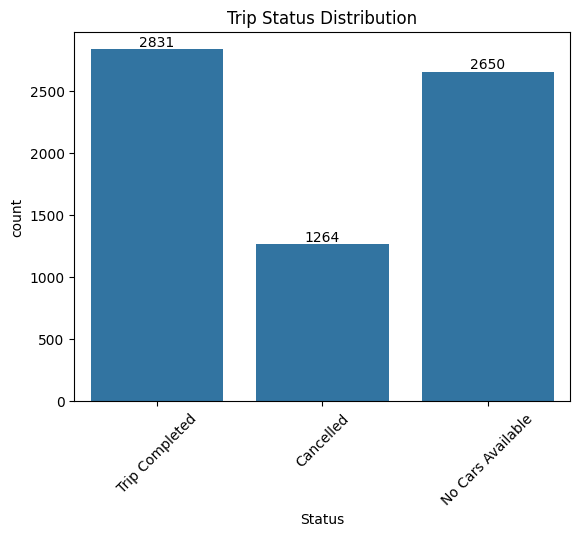

In [39]:
ax = sns.countplot(x='Status', data=df)
plt.title("Trip Status Distribution")
plt.xticks(rotation=45)
for bars in ax.containers:
    ax.bar_label(bars)

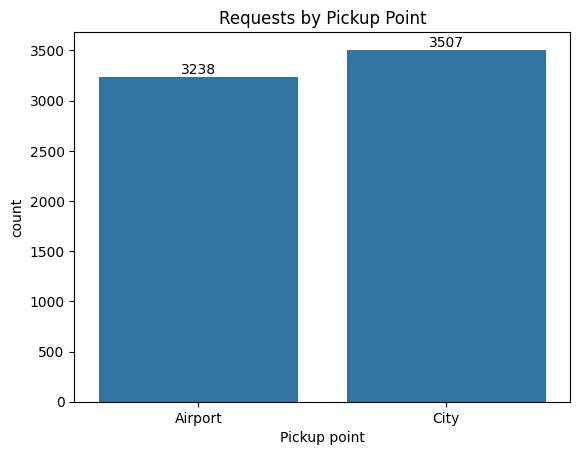

In [56]:
ay = sns.countplot(x='Pickup point', data=df)
plt.title("Requests by Pickup Point")
for bars in ay.containers:
    ay.bar_label(bars)

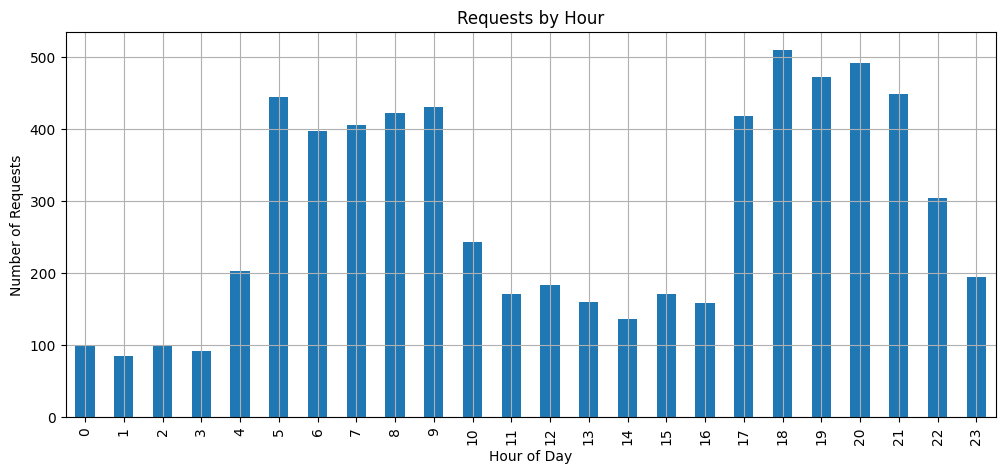

In [6]:
# Requests per Hour
df['Request Hour'].value_counts().sort_index().plot(kind='bar', figsize=(12, 5))
plt.title("Requests by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.grid(True)
plt.show()

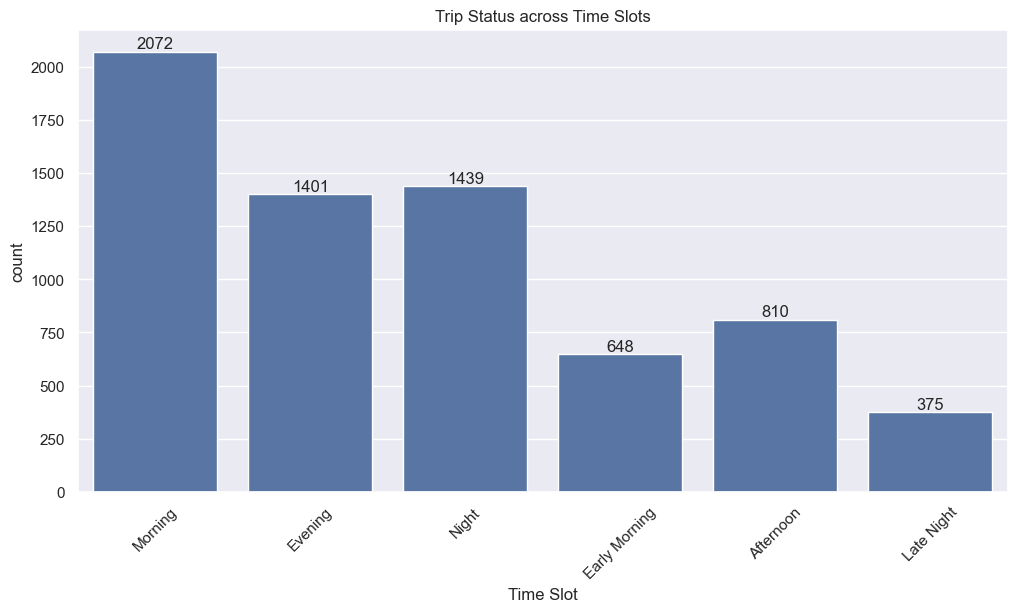

In [98]:
ap= sns.countplot(data=df, x='Time Slot')
plt.title("Trip Status across Time Slots")
plt.xticks(rotation=45)
for bars in ap.containers:
    ap.bar_label(bars)

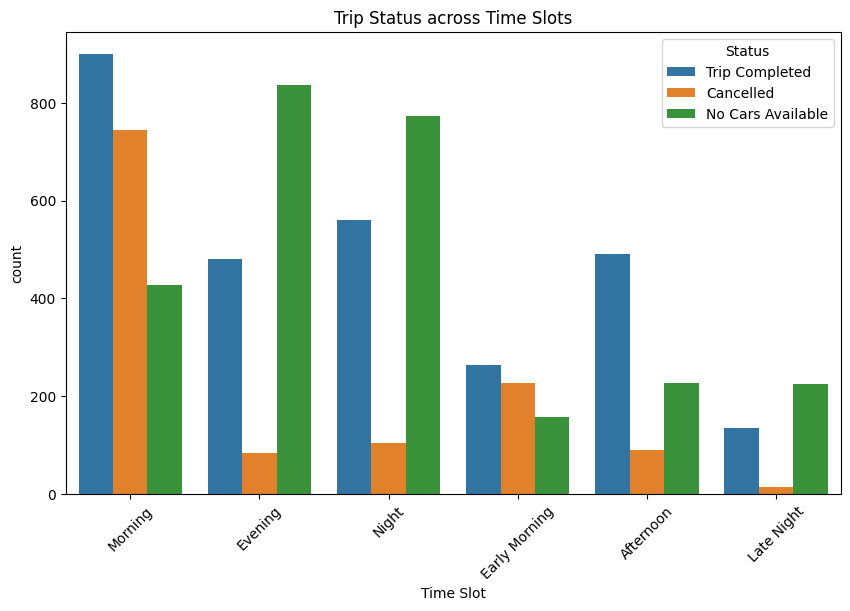

In [7]:
# Time Slot vs Status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Time Slot', hue='Status')
plt.title("Trip Status across Time Slots")
plt.xticks(rotation=45)
plt.show()

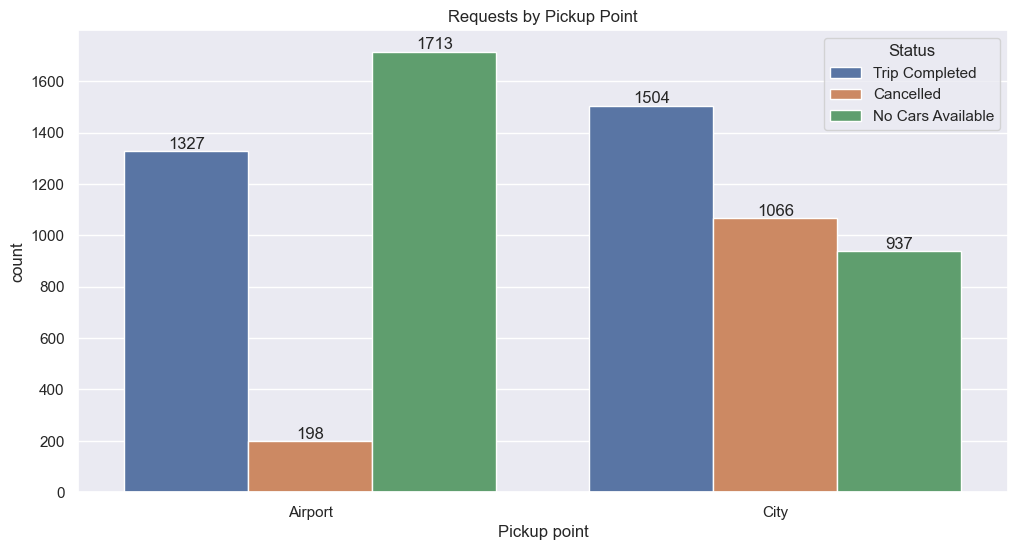

In [93]:
ay = sns.countplot(x='Pickup point', data=df, hue='Status')
plt.title("Requests by Pickup Point")
for bars in ay.containers:
    ay.bar_label(bars)

In [8]:
# Missing values
print(df.isnull().sum())

Trip id                    0
Request id                 0
Pickup point               0
Driver id                  0
Status                     0
Request Hour               0
Request timestamp          0
Drop timestamp          3914
Trip Duration (mins)    3914
Is Completed               0
Time Slot                  0
DAY                        0
dtype: int64


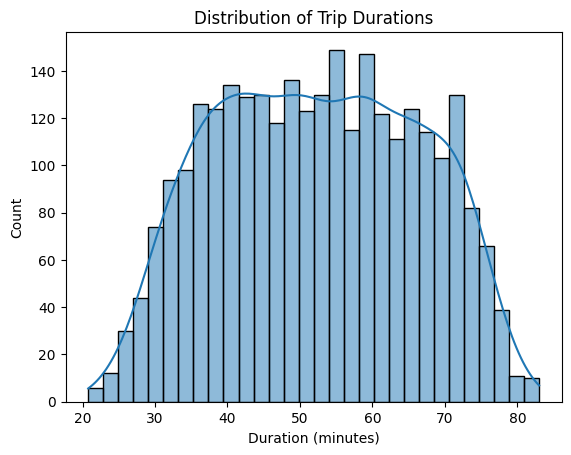

In [10]:
# Plot trip durations
sns.histplot(df['Trip Duration (mins)'], bins=30, kde=True)
plt.title("Distribution of Trip Durations")
plt.xlabel("Duration (minutes)")
plt.show()


In [14]:
df['Trip Duration (mins)'] = pd.to_numeric(df['Trip Duration (mins)'], errors='coerce')

In [15]:
df = df.dropna(subset=['Trip Duration (mins)', 'Time Slot'])

In [16]:
df = df[(df['Trip Duration (mins)'] > 0) & (df['Trip Duration (mins)'] <= 300)]

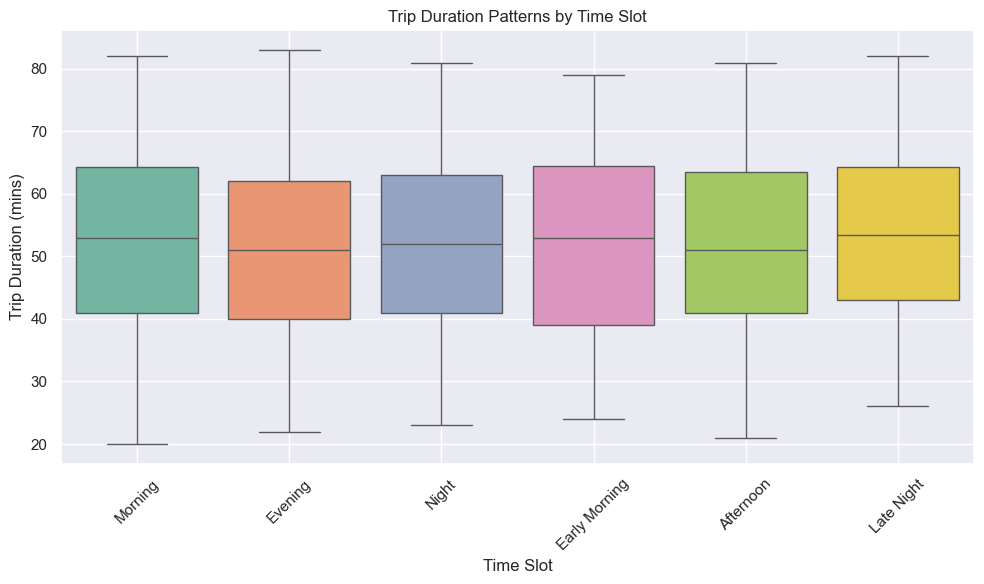

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Time Slot', 
    y='Trip Duration (mins)', 
    data=df, 
    hue='Time Slot', 
    palette='Set2', 
    legend=False
)
plt.title('Trip Duration Patterns by Time Slot')
plt.xlabel('Time Slot')
plt.ylabel('Trip Duration (mins)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

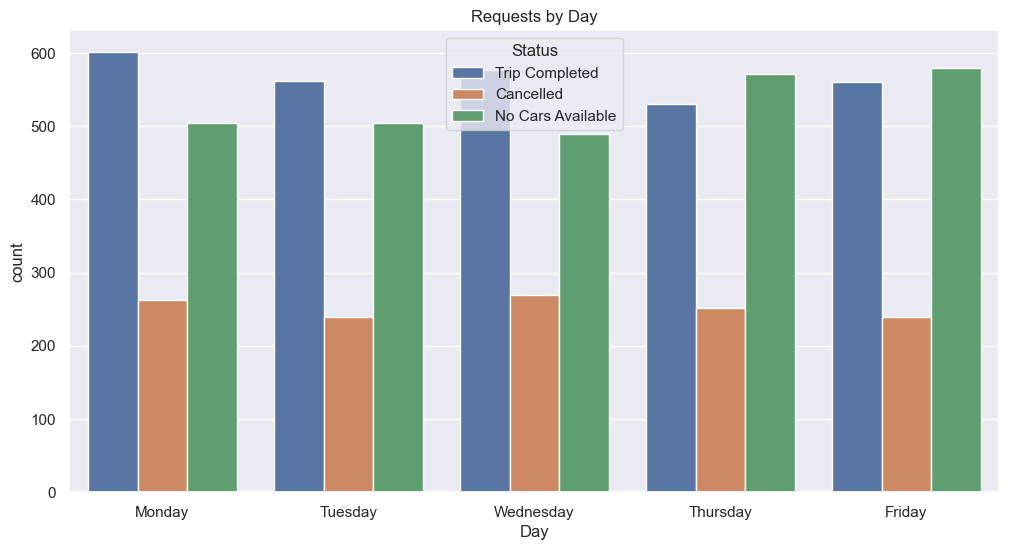

In [90]:
sns.countplot(x='DAY', data=df, hue='Status')
plt.title("Requests by Day")
plt.xlabel("Day")
plt.show()

In [99]:
df.to_csv('cleaned_uber_data_with_insights.csv', index=False)

SOLUTION- 
Recommendations:
    Based on the data analysis, several actionable recommendations were made:
    Increase driver deployment during high-demand hours, especially at the airport.
    Implement demand forecasting to proactively manage supply during peak hours.
    Improve driver routing and assignment algorithms to reduce ‘No Cars Available’ issues.
    Prioritize airport pickup optimization by offering driver incentives or route planning.

CONCLUSION-
This project identified key issues in Uber’s operations—like peak-hour demand spikes, high airport cancellations, and driver shortages. Using Python and SQL, we gained actionable insights and recommended practical solutions to improve service efficiency and customer satisfaction.